In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
from sklearn.datasets import make_friedman2
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

In [2]:
class MLayerNN(nn.Module):
    def __init__(self, in_dim, out_dim, depth, N_params):
        super(MLayerNN, self).__init__()
        self.test_loss = []
        self.train_loss = []
        # Initialize layer sizes list
        layer_dims = [in_dim]  # First layer is input dim
        #h = int(N_params / ((in_dim + out_dim) * (depth)))
        #while (in_dim * h + (depth-3) * h**2 + h * out_dim) > N_params:
        #    h -= 1
        h = 512
        layer_dims += [int(h)] * (depth - 2)  # Set all hidden layers to hidden_dim
        layer_dims.append(out_dim)  # Last layer is output dim
        print(layer_dims)
        self.layers = nn.ModuleList([
            nn.Linear(layer_dims[i-1], layer_dims[i]) for i in range(1,depth)
        ])
        self.params = sum(p.numel() for p in self.parameters() if p.ndimension() > 1)
        self.activation = nn.ReLU()
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = self.activation(layer(x))  # Apply ReLU activation
        return self.layers[-1](x)  # Final layer without activation

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_friedman3
def get_loader(noise, n_samples=20000):
    # Set the seed for reproducibility
    seed = 42
    np.random.seed(seed)
    torch.manual_seed(seed)

    # Generate the Friedman dataset
    X_train, y_train = make_friedman3(n_samples=int(n_samples * 0.8), random_state=seed, noise=noise)
    X_test, y_test = make_friedman3(n_samples=int(n_samples * 0.2), random_state=seed, noise=0.0)

    # Reshape targets to match expected input dimensions
    y_train = np.expand_dims(y_train, axis=1)
    y_test = np.expand_dims(y_test, axis=1)

    # Apply feature scaling (Standardization) ONLY to `X`
    scaler_X = StandardScaler()
    X_train = scaler_X.fit_transform(X_train)  # Fit and transform training data
    X_test = scaler_X.transform(X_test)        # Transform test data (using train stats)
    # Convert numpy arrays to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)  # Keep `y` unchanged
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)    # Keep `y` unchanged

    # Create TensorDataset for train and test sets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    # Set batch size and create DataLoader for training and testing
    batch_size = 1024
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    return train_loader, test_loader

In [4]:
@torch.no_grad()
def compute_test_loss(test_loader, model):
    criterion = torch.nn.MSELoss()
    running_loss = 0.
    for batch, target in test_loader:
        outputs = model(batch)
        loss = criterion(target, outputs)
        running_loss += loss.item()
    return running_loss / len(test_loader)

[4, 512, 512, 512, 1]
Epoch [1/1000], Loss: 0.373984, test: 0.143092, lr: 0.001000
Epoch [2/1000], Loss: 0.093837, test: 0.063393, lr: 0.001000
Epoch [3/1000], Loss: 0.047234, test: 0.027156, lr: 0.001000
Epoch [4/1000], Loss: 0.018371, test: 0.013383, lr: 0.001000
Epoch [5/1000], Loss: 0.011535, test: 0.010371, lr: 0.001000
Epoch [6/1000], Loss: 0.008560, test: 0.007817, lr: 0.001000
Epoch [7/1000], Loss: 0.006512, test: 0.006138, lr: 0.001000
Epoch [8/1000], Loss: 0.005098, test: 0.004799, lr: 0.001000
Epoch [9/1000], Loss: 0.003953, test: 0.003890, lr: 0.001000
Epoch [10/1000], Loss: 0.003210, test: 0.003184, lr: 0.001000
Epoch [11/1000], Loss: 0.002757, test: 0.002799, lr: 0.001000
Epoch [12/1000], Loss: 0.002254, test: 0.002374, lr: 0.001000
Epoch [13/1000], Loss: 0.002033, test: 0.002195, lr: 0.001000
Epoch [14/1000], Loss: 0.001727, test: 0.001910, lr: 0.001000
Epoch [15/1000], Loss: 0.001616, test: 0.001982, lr: 0.001000
Epoch [16/1000], Loss: 0.001529, test: 0.001610, lr: 0.00

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.000011, test: 0.000022, lr: 0.001000


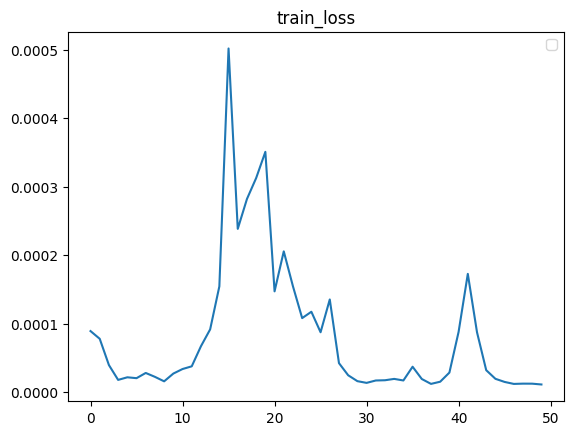

Training Complete!
[4, 512, 512, 512, 1]
Epoch [1/1000], Loss: 0.414743, test: 0.143885, lr: 0.001000
Epoch [2/1000], Loss: 0.132900, test: 0.063412, lr: 0.001000
Epoch [3/1000], Loss: 0.087315, test: 0.027876, lr: 0.001000
Epoch [4/1000], Loss: 0.059289, test: 0.014361, lr: 0.001000
Epoch [5/1000], Loss: 0.052297, test: 0.011219, lr: 0.001000
Epoch [6/1000], Loss: 0.049577, test: 0.008958, lr: 0.001000
Epoch [7/1000], Loss: 0.048027, test: 0.007310, lr: 0.001000
Epoch [8/1000], Loss: 0.046452, test: 0.006294, lr: 0.001000
Epoch [9/1000], Loss: 0.045626, test: 0.005391, lr: 0.001000
Epoch [10/1000], Loss: 0.044526, test: 0.004669, lr: 0.001000
Epoch [11/1000], Loss: 0.043985, test: 0.004351, lr: 0.001000
Epoch [12/1000], Loss: 0.043503, test: 0.003944, lr: 0.001000
Epoch [13/1000], Loss: 0.043199, test: 0.003814, lr: 0.001000
Epoch [14/1000], Loss: 0.042977, test: 0.003037, lr: 0.001000
Epoch [15/1000], Loss: 0.042846, test: 0.004008, lr: 0.001000
Epoch [16/1000], Loss: 0.042878, test:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.009656, test: 0.029049, lr: 0.001000


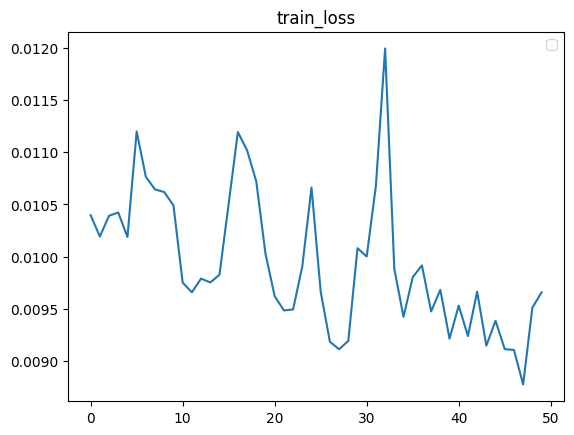

Training Complete!
[4, 512, 512, 512, 1]
Epoch [1/1000], Loss: 0.627714, test: 0.144612, lr: 0.001000
Epoch [2/1000], Loss: 0.344100, test: 0.063547, lr: 0.001000
Epoch [3/1000], Loss: 0.300160, test: 0.030132, lr: 0.001000
Epoch [4/1000], Loss: 0.273973, test: 0.016205, lr: 0.001000
Epoch [5/1000], Loss: 0.266370, test: 0.014798, lr: 0.001000
Epoch [6/1000], Loss: 0.265329, test: 0.013116, lr: 0.001000
Epoch [7/1000], Loss: 0.264852, test: 0.011635, lr: 0.001000
Epoch [8/1000], Loss: 0.262639, test: 0.010467, lr: 0.001000
Epoch [9/1000], Loss: 0.262340, test: 0.013594, lr: 0.001000
Epoch [10/1000], Loss: 0.260978, test: 0.010113, lr: 0.001000
Epoch [11/1000], Loss: 0.259437, test: 0.008042, lr: 0.001000
Epoch [12/1000], Loss: 0.258218, test: 0.007954, lr: 0.001000
Epoch [13/1000], Loss: 0.257009, test: 0.007217, lr: 0.001000
Epoch [14/1000], Loss: 0.256940, test: 0.006517, lr: 0.001000
Epoch [15/1000], Loss: 0.255091, test: 0.007165, lr: 0.001000
Epoch [16/1000], Loss: 0.256622, test:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.043110, test: 0.198794, lr: 0.001000


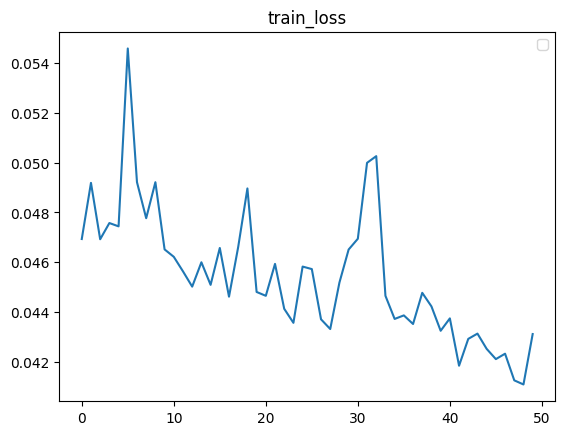

Training Complete!
[4, 512, 512, 512, 1]
Epoch [1/1000], Loss: 1.388092, test: 0.146604, lr: 0.001000
Epoch [2/1000], Loss: 1.103568, test: 0.064097, lr: 0.001000
Epoch [3/1000], Loss: 1.060738, test: 0.033642, lr: 0.001000
Epoch [4/1000], Loss: 1.036088, test: 0.019323, lr: 0.001000
Epoch [5/1000], Loss: 1.023931, test: 0.016161, lr: 0.001000
Epoch [6/1000], Loss: 1.026079, test: 0.017697, lr: 0.001000
Epoch [7/1000], Loss: 1.027089, test: 0.015415, lr: 0.001000
Epoch [8/1000], Loss: 1.023069, test: 0.014314, lr: 0.001000
Epoch [9/1000], Loss: 1.025393, test: 0.017430, lr: 0.001000
Epoch [10/1000], Loss: 1.032248, test: 0.024187, lr: 0.001000
Epoch [11/1000], Loss: 1.023329, test: 0.011271, lr: 0.001000
Epoch [12/1000], Loss: 1.019250, test: 0.019065, lr: 0.001000
Epoch [13/1000], Loss: 1.017783, test: 0.012460, lr: 0.001000
Epoch [14/1000], Loss: 1.016245, test: 0.013199, lr: 0.001000
Epoch [15/1000], Loss: 1.015386, test: 0.015640, lr: 0.001000
Epoch [16/1000], Loss: 1.020199, test:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch [1000/1000], Loss: 0.134179, test: 0.842593, lr: 0.001000


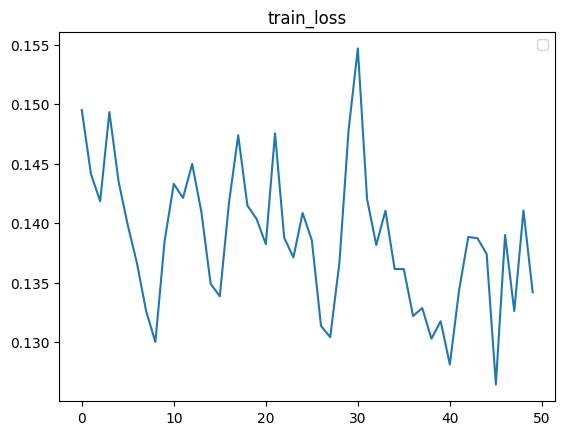

Training Complete!


In [6]:
import time
import dill
n_samples = 20000
in_dims = [4]
noises = [0,0.2,0.5,1.]
train_losses = []
test_losses = []
adjust = True
for j,in_dim in enumerate(in_dims):
    for noise in noises:
        param = 1
        train_loader, test_loader = get_loader(noise,n_samples)
        model = MLayerNN(in_dim, 1, depth = 5 , N_params = param)
        epochs = 1000
        model.train()
        optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0)
        criterion = torch.nn.MSELoss()
        for epoch in range(epochs):
            running_loss = 0.0 
            for batch, target in train_loader:
                start_time = time.time()
                optimizer.zero_grad()
                outputs = model(batch)
                loss = criterion(target, outputs)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            avg_loss = running_loss / len(train_loader)
            model.train_loss.append(avg_loss)
            test_l = compute_test_loss(test_loader, model)
            #if (test_l < 1) and (adjust):
            #    adjust = False
            #    for param_group in optimizer.param_groups:
            #        param_group['lr'] *= 0.1
            model.test_loss.append(test_l)
            print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.6f}, test: {test_l:.6f}, lr: {optimizer.param_groups[0]['lr']:6f}")
        plt.plot(model.train_loss[-50:])
        plt.title(f'train_loss')
        plt.legend()
        plt.show()
        print("Training Complete!")
        with open(f"models/freid3_NN{noise}_{in_dim}.dill", "wb") as f:
            dill.dump(model, f)